# **MultiModal RAG App for Video Processing With LlamaIndex and LanceDB**

### 1. llamaindex framework
### 2. Lancedb Vector DataBase
### 3. LLM MultiModAl GPT-4V or Google-gemini-pro-vision


# **Steps Need to follow:**
#### 1. Download video from YouTube, process and store it.

#### 2. Build Multi-Modal index and vector store for both texts and images.

#### 3. Retrieve relevant images and context, use both to augment the prompt.

#### 4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

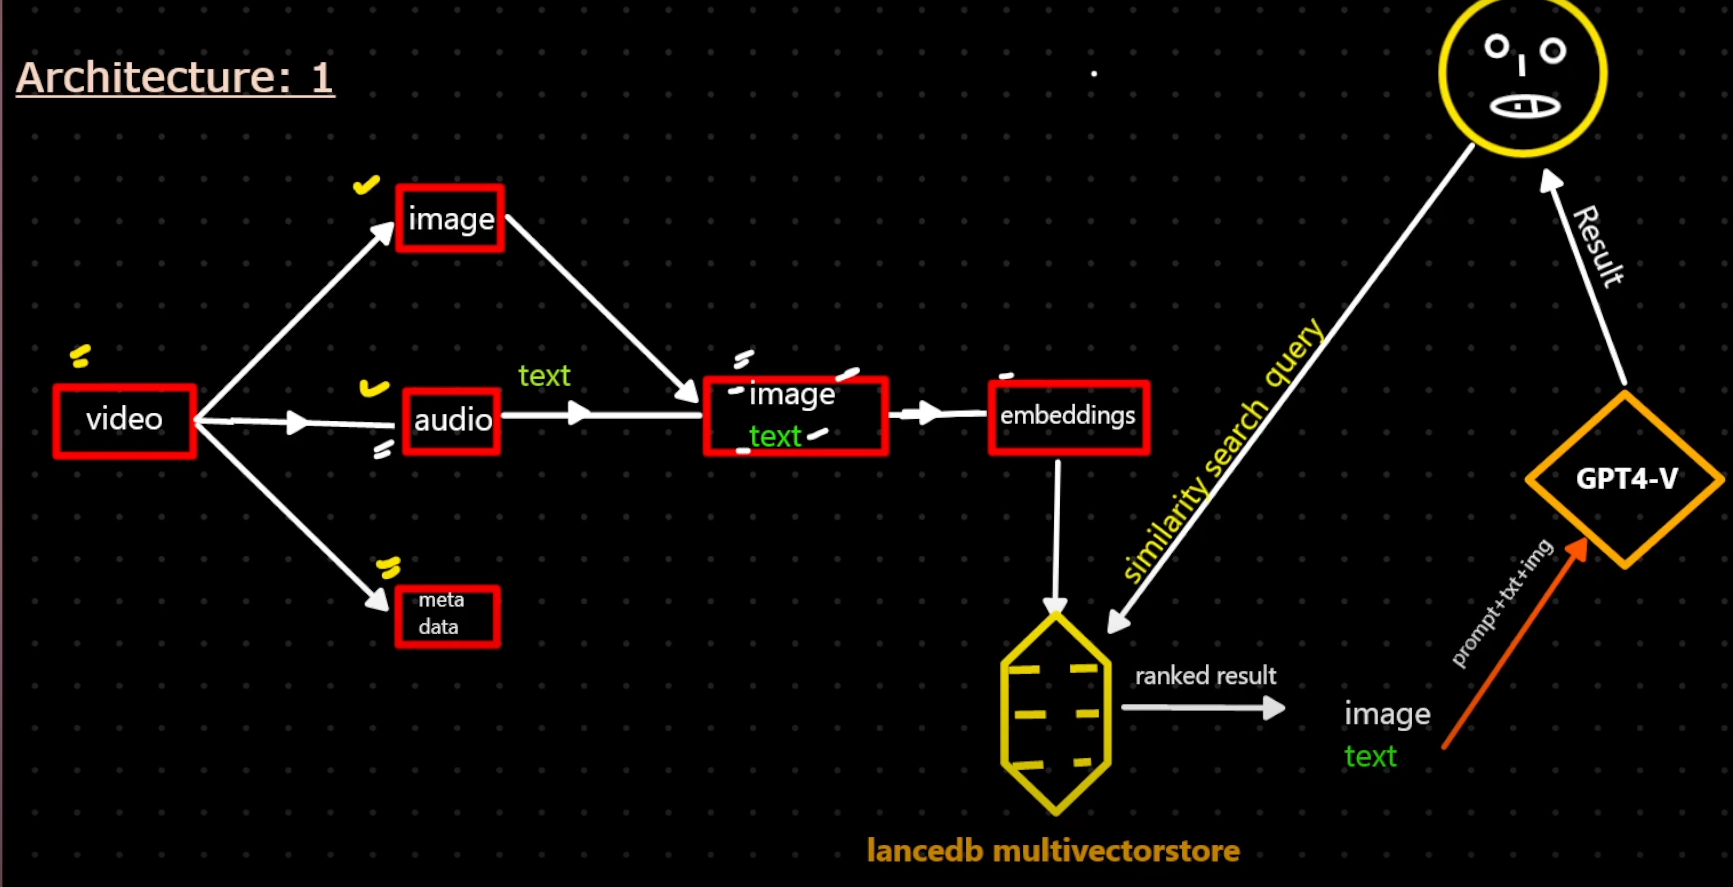

In [1]:
# %pip install llama-index-vector-stores-lancedb
# %pip install llama-index-multi-modal-llms-openai
# %pip install llama-index-embeddings-clip
# %pip install git+https://github.com/openai/CLIP.git
# %!pip install llama-index-readers-file

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.1/136.1 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-i2bmz3mr
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-i2bmz3mr
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=0dec45dfb1bd27829c86245f9e5d0e3e15b5aa3fa618dc4c8906052d77c880dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-txu2nl_n/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 7.7 MB/s eta 0:00:00


In [2]:
# %pip install llama_index
# %pip install -U openai-whisper # for generating transcript from videos or maybe from some other

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801358 sha256=397b83347b361a46eb32640b2e64cf144eb463a09d29cad06af5c2a446e7b7fe
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper


In [3]:
# %pip install lancedb
# %pip install moviepy
# %pip install pytube
# %pip install pydub
# %pip install SpeechRecognition
# %pip install ffmpeg-python
# %pip install soundfile
# %pip install torch torchvision
# %pip install matplotlib scikit-image
# %pip install ftfy regex tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index-embeddings-clip 0.1.5 requires pillow<11.0.0,>=10.2.0, but you have pillow 10.0.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 40.8 MB/s eta 0:00:00


ffmpeg-library enables you to use FFmpeg in Python to manipulate various media files for different purposes like building comprehensive multimedia applications, preprocessing media files.

MoviePy is a Python library for video editing, enabling cutting, concatenations, title insertions, video compositing, and effects like animations or color grading.

Pytube is a Python library used for downloading videos from YouTube. It supports downloading in various formats, resolutions, and also direct audio extraction.


Pydub is a Python library for audio manipulation, enabling easy loading,
editing, and exporting of audio files in various formats with minimal code.

The SpeechRecognition library in Python allows you to convert spoken language into text using various engines and APIs, such as Google Speech Recognition, IBM Speech to Text, etc.


SoundFile is a Python library for reading from and writing to audio files, supporting many formats through the libsndfile library, ideal for high-quality audio processing.

FTFY (Fix Text For You) is a Python library that fixes broken Unicode text and mojibake (garbled text due to encoding issues), making text legible again.

OpenAI Whisper is a robust, multilingual speech recognition model developed by OpenAI. It converts speech into text and supports various languages with high accuracy.

pprint is a Python module that provides a capability to "pretty-print" complex data structures in a well-formatted and more readable way than the basic print function.

In [4]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
import os
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [9]:
import os
print(os.getcwd())

/content


In [10]:
video_url="https://youtu.be/3dhcmeOTZ_Q"

In [11]:
output_video_path = "/content/video_data/"

In [13]:
# from the video collect images,audio,text
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [14]:
# !mkdir mixed_data

In [15]:
filepath=output_video_path + "input_vid.mp4"
print(filepath)

/content/video_data/input_vid.mp4


In [16]:
from pytube import YouTube # download the video and give it name and store it
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}

  yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4" # download the video and then give it name "input_vide.mp4" and store in output_path
    )
  return metadata

In [17]:
from moviepy.editor import VideoFileClip # collect video in frame
def video_to_images(video_path,output_folder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2 # fps=frame per second, this mean get 0.2 frame(image) per second and process it and store it in output_folder
  )

In [18]:
def video_to_audio(video_path,output_audio_path): # collect the audio
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

In [19]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer() # Initialize the Recognizer
  audio=sr.AudioFile(audio_path) # Load the Audio File

  with audio as source:
    audio_data=recognizer.record(source) #  Extract Audio Data
    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data) # Whisper model(speech-to-text model developed by OpenAI) to process the audio data and extract the spoken content as text

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

In [20]:
video_url

'https://youtu.be/3dhcmeOTZ_Q'

In [21]:
output_video_path

'/content/video_data/'

In [22]:
metadata_vid = download_video(video_url, output_video_path)

In [23]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 7286}

In [24]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [25]:
filepath

'/content/video_data/input_vid.mp4'

In [26]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [27]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [28]:
text_data=audio_to_text(output_audio_path)

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 133MiB/s]


In [29]:
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [30]:
# output_folder = "/content/mixed_data/"
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()


Text data saved to file


In [31]:
# os.remove(output_audio_path)
# print("Audio file removed")

Audio file removed


In [ ]:
#process the video
#image
#text

In [32]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [33]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [34]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection") # uri = location of the database where text and image will be store
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [35]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store) # creates a storage context that tells the system how and where to store data

In [36]:
output_folder

'/content/mixed_data/'

In [37]:
documents=SimpleDirectoryReader(output_folder).load_data() # reads documents from the specified directory (output_folder)

In [38]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context) #  creates an index from the loaded documents (documents) and store in database

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 69.7MiB/s]


In [56]:
retriever_engine=index.as_retriever(similarity_top_k=1, image_similarity_top_k=5)

In [40]:
retriever_engine

In [57]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [58]:
def retrieve_data(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [84]:
query="can you tell me what is linear regression? explain equation of the multiple linear regression?"

In [85]:
img,text=retrieve_data(retriever_engine,query)

**Node ID:** aec6ceb6-129d-43e5-b1c1-921016db203f<br>**Similarity:** 0.7475849986076355<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [86]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

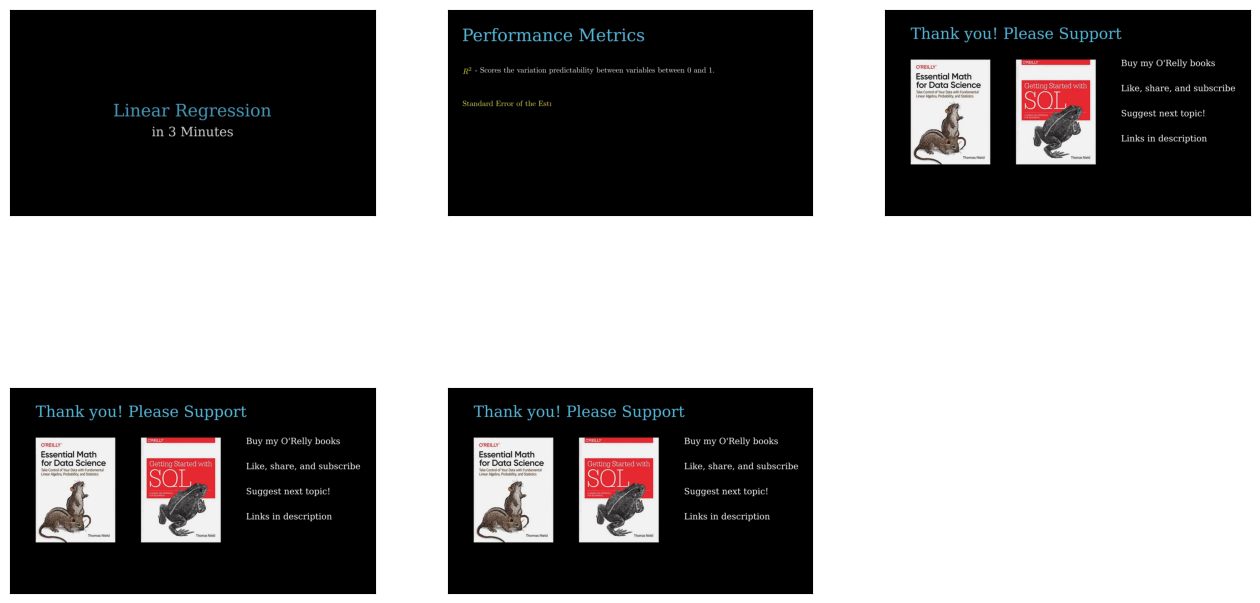

In [87]:
plot_images(img)

In [64]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [67]:
img

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0044.png',
 '/content/mixed_data/frame0042.png',
 '/content/mixed_data/frame0045.png']

In [68]:
import json
metadata_str=json.dumps(metadata_vid)

In [70]:
query_str="can you tell me what is linear regression and equation of linear regression?"

In [66]:
context_str = "".join(text) # img,text=retrieve(retriever_engine,query)

In [71]:
image_documents = SimpleDirectoryReader( input_files=img).load_data()

In [51]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [63]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500)

In [77]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        query_str=query_str,metadata_str=metadata_str, context_str = context_str
    ),
    image_documents=image_documents,
)

In [78]:
print(result.text)

('Linear regression is a statistical method used to model the relationship '
 'between a dependent variable and one or more independent variables. The '
 'method assumes that the relationship between the variables is linear, '
 'meaning that it can be represented by a straight line.\n'
 '\n'
 'The equation of a simple linear regression, which involves a single '
 'independent variable, is:\n'
 '\n'
 '\\[ y = \\beta_0 + \\beta_1x + \\epsilon \\]\n'
 '\n'
 'Here, \\( y \\) is the dependent variable, \\( x \\) is the independent '
 'variable, \\( \\beta_0 \\) is the y-intercept, \\( \\beta_1 \\) is the slope '
 'of the line (which represents the effect of the independent variable on the '
 'dependent variable), and \\( \\epsilon \\) represents the error term, which '
 'accounts for the variability in \\( y \\) that cannot be explained by \\( x '
 '\\).\n'
 '\n'
 'In multiple linear regression, where there are multiple independent '
 'variables, the equation is extended to:\n'
 '\n'
 '\\[ 

In [76]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)